In [1]:
 #!/usr/bin/env python -W ignore::DeprecationWarning

import pylab
import numpy
import pandas
import sklearn
import warnings
import imblearn
import imblearn
import numpy as np 


from matplotlib import pyplot
import matplotlib.pyplot as plt
from collections import Counter
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from mlxtend.classifier import StackingClassifier


warnings.filterwarnings('ignore')



//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 

In [2]:
# data source - https://www.kaggle.com/ronitf/heart-disease-uci
df = pandas.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploratory data analysis 

### Age

,Age,amount
0,58,19
1,57,17
2,54,16
3,59,14
4,52,13
5,51,12
6,62,11
7,44,11
8,60,11
9,56,11


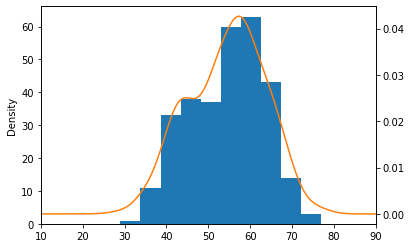

In [3]:
ax = df["age"].plot(kind='hist') # plot hist
plt = df["age"].plot(kind='kde', ax=ax, secondary_y=True) # plot line with hist
plt.set_xlim(10, 90) # set range

df["age"].value_counts().nlargest(10).reset_index().rename(columns={"index": "Age", "age": "amount"})

### Sex

,sex,amount
0,1,207
1,0,96


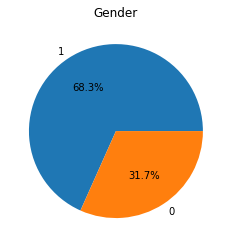

In [4]:
df["sex"].value_counts().plot(kind='pie', autopct='%1.1f%%', title = "Gender") # plot pie
pylab.axes().set_ylabel('')


df["sex"].value_counts().reset_index().rename(columns={"index": "sex", "sex": "amount"})

### chest pain type

,CP types,amount
0,0,143
1,2,87
2,1,50
3,3,23


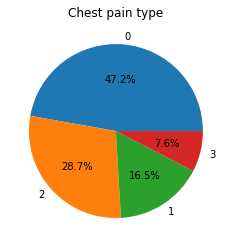

In [5]:
# cp: chest pain type
# -- Value 0: asymptomatic 無症狀
# -- Value 1: atypical angina
# -- Value 2: non-anginal pain
# -- Value 3: typical angina

df["cp"].value_counts().plot(kind='pie', autopct='%1.1f%%', title = "Chest pain type")
pylab.axes().set_ylabel('')

df["cp"].astype('category').value_counts().reset_index().rename(columns={"index": "CP types", "cp": "amount"})


### Resting blood pressure 

,Resting blood pressure,amount
0,120,37
1,130,36
2,140,32
3,110,19
4,150,17
5,138,13
6,128,12
7,125,11
8,160,11
9,112,9


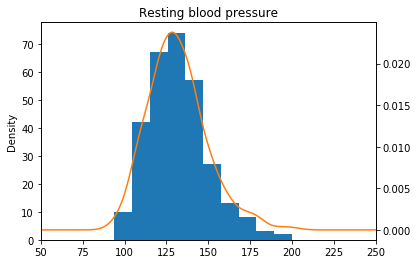

In [6]:
ax = df["trestbps"].plot(kind='hist')
plt = df["trestbps"].plot(kind='kde', ax=ax, secondary_y=True, title = "Resting blood pressure")
plt.set_xlim(50, 250)

df["trestbps"].astype('int').value_counts().nlargest(10).reset_index().rename(columns={"index": "Resting blood pressure", "trestbps": "amount"})

### Serum cholestoral in mg/dl

,Serum cholestoral in mg/dl,amount
0,234,6
1,204,6
2,197,6
3,269,5
4,212,5
5,254,5
6,226,4
7,243,4
8,240,4
9,239,4


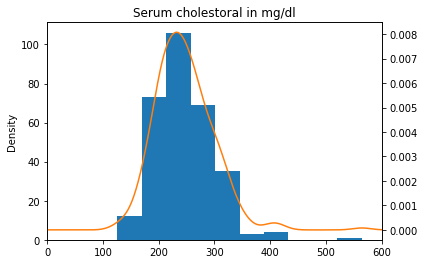

In [7]:
ax = df["chol"].plot(kind='hist')
plt = df["chol"].plot(kind='kde', ax=ax, secondary_y=True, title = "Serum cholestoral in mg/dl")
plt.set_xlim(0, 600)

df["chol"].astype('int').value_counts().nlargest(10).reset_index().rename(columns={"index": "Serum cholestoral in mg/dl", "chol": "amount"})

### Fasting blood sugar > 120 mg/dl

,FBS,amount
0,0,258
1,1,45


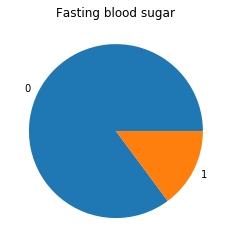

In [8]:
df["fbs"].value_counts().plot(kind='pie', title = "Fasting blood sugar")
pylab.axes().set_ylabel('')


df["fbs"].value_counts().reset_index().rename(columns={"index": "FBS", "fbs": "amount"})

### Resting electrocardiographic results(RES)

,RES,amount
0,1,152
1,0,147
2,2,4


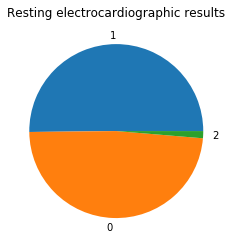

In [9]:
# 19 restecg: resting electrocardiographic results 
# -- Value 0: normal 
# -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
# -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

df["restecg"].value_counts().plot(kind='pie', title = "Resting electrocardiographic results")
pylab.axes().set_ylabel('')


df["restecg"].astype('category').value_counts().reset_index().rename(columns={"index": "RES", "restecg": "amount"})


### Maximum heart rate achieved 

,Maximum heart rate achieved,amount
0,162,11
1,160,9
2,163,9
3,173,8
4,152,8
5,125,7
6,132,7
7,150,7
8,172,7
9,143,7


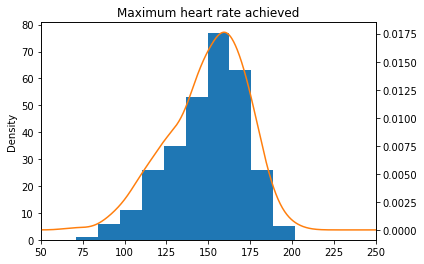

In [10]:
ax = df["thalach"].plot(kind='hist')
plt = df["thalach"].plot(kind='kde', ax=ax, secondary_y=True, title = "Maximum heart rate achieved")
plt.set_xlim(50, 250)

df["thalach"].astype('int').value_counts().nlargest(10).reset_index().rename(columns={"index": "Maximum heart rate achieved ", "thalach": "amount"})

### Exercise induced angina 

,Exercise induced angina,amount
0,0,204
1,1,99


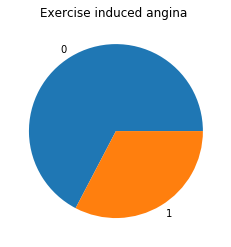

In [11]:
df["exang"].value_counts().plot(kind='pie', title = "Exercise induced angina ")
pylab.axes().set_ylabel('')


df["exang"].value_counts().reset_index().rename(columns={"index": "Exercise induced angina", "exang": "amount"})

### ST depression induced by exercise relative to rest

,ST depression,amount
0,0,166
1,1,78
2,2,34
3,3,17
4,4,6
5,6,1
6,5,1


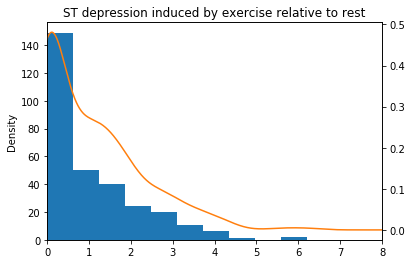

In [12]:
ax = df["oldpeak"].plot(kind='hist')
plt = df["oldpeak"].plot(kind='kde', ax=ax, secondary_y=True, title = "ST depression induced by exercise relative to rest")
plt.set_xlim(0, 8)

df["oldpeak"].astype('int').value_counts().nlargest(10).reset_index().rename(columns={"index": "ST depression", "oldpeak": "amount"})

### The slope of the peak exercise ST segment

,Slope of peak exercise ST segment,amount
0,2,142
1,1,140
2,0,21


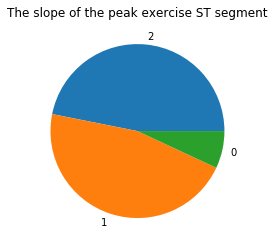

In [13]:
df["slope"].value_counts().plot(kind='pie', title = "The slope of the peak exercise ST segment")
pylab.axes().set_ylabel('')


df["slope"].astype('category').value_counts().reset_index().rename(columns={"index": "Slope of peak exercise ST segment", "slope": "amount"})

###  Number of major vessels (0-3) colored by flourosopy 

,Number of major vessels colored by flourosopy,amount
0,0.0,175
1,1.0,65
2,2.0,38
3,3.0,20
4,4.0,5


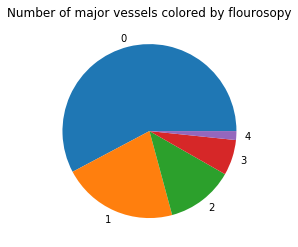

In [14]:
df["ca"].value_counts().plot(kind='pie', title = "Number of major vessels colored by flourosopy")
pylab.axes().set_ylabel('')


df["ca"].astype('float').value_counts().reset_index().rename(columns={"index": "Number of major vessels colored by flourosopy", "ca": "amount"})

### Maximum heart rate achieved

,Maximum heart rate achieved,amount
0,2,166
1,3,117
2,1,18
3,0,2


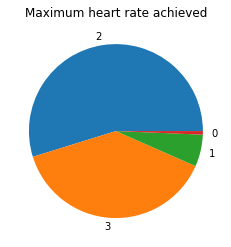

In [15]:
# thal: 1 = fixed defect; 2 = normal; 3 = reversable defect

df["thal"].value_counts().plot(kind='pie', title = "Maximum heart rate achieved")
pylab.axes().set_ylabel('')


df["thal"].astype('category').value_counts().reset_index().rename(columns={"index": "Maximum heart rate achieved", "thal": "amount"})

### Target

1    165
0    138
Name: target, dtype: int64

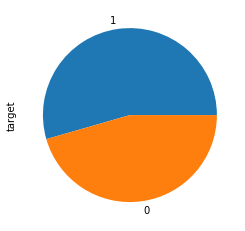

In [16]:
#  0 = disease, 1 = no disease
df["target"].value_counts().plot(kind='pie')
df["target"].astype('category').value_counts()

# Pre-processing

### Decimal data type

In [17]:
# age slope, ca 正負值處理
# trestbps chol thalach oldpeak 百分比處理

df[["age","slope","trestbps","chol", "thalach", "oldpeak", "slope"]] 

,age,slope,trestbps,chol,thalach,oldpeak,slope
0,63,0,145,233,150,2.3,0
1,37,0,130,250,187,3.5,0
2,41,2,130,204,172,1.4,2
3,56,2,120,236,178,0.8,2
4,57,2,120,354,163,0.6,2
...,...,...,...,...,...,...,...
298,57,1,140,241,123,0.2,1
299,45,1,110,264,132,1.2,1
300,68,1,144,193,141,3.4,1
301,57,1,130,131,115,1.2,1


In [18]:
df[["age","slope","ca"]] = (df[["age","slope","ca"]] - df[["age","slope","ca"]].mean())
df[["trestbps","chol", "thalach", "oldpeak"]] = (df[["trestbps","chol", "thalach", "oldpeak"]] - df[["trestbps","chol", "thalach", "oldpeak"]].min()) / df[["trestbps","chol", "thalach", "oldpeak"]].max()

### Character data type

In [19]:
# sex fbs exang True/False 方式處理
# cp restecg cat (change to 10) 把多元數值改為 True False 值處理
# thal  missing values 有資料缺失問題

df[["sex", "cp", "fbs", "restecg", "exang", "thal"]]

,sex,cp,fbs,restecg,exang,thal
0,1,3,1,0,0,1
1,1,2,0,1,0,2
2,0,1,0,0,0,2
3,1,1,0,1,0,2
4,0,0,0,1,1,2
...,...,...,...,...,...,...
298,0,0,0,1,1,3
299,1,3,0,1,0,3
300,1,0,1,1,0,3
301,1,0,0,1,1,3


In [20]:
df[["sex","fbs","exang"]] # 01 處理

,sex,fbs,exang
0,1,1,0
1,1,0,0
2,0,0,0
3,1,0,0
4,0,0,1
...,...,...,...
298,0,0,1
299,1,0,0
300,1,1,0
301,1,0,1


In [21]:
# 把多元數值改為 True False 值處理

df["cp"] = df["cp"].replace(to_replace =[2,3], value =0) 
df["restecg"] = df["restecg"].replace(to_replace =[2,3], value =0) 

In [22]:
# 缺值處理 並把多元數值改為 True False 值處理

df = df[df["thal"] != 0] # remove Null
df["thal"] = df["thal"].replace(to_replace =[1,3], value =1) # 不正常 有疾病
df["thal"] = df["thal"].replace(to_replace =[2], value =0) # 正常 

# Feature Importance

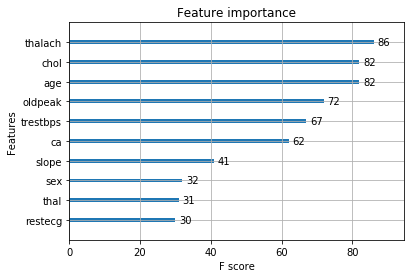

In [23]:
# xgboost


model = XGBClassifier()
model.fit(df.drop(columns = ["target"]), df["target"])

# plot feature importance
plot_importance(model, max_num_features= 10)
pyplot.show()

Feature ranking:
1. feature 12 thal (0.175314)
2. feature 11 ca (0.124064)
3. feature 7 thalach (0.094940)
4. feature 8 exang (0.094518)
5. feature 9 oldpeak (0.090778)
6. feature 0 age (0.084061)
7. feature 3 trestbps (0.074333)
8. feature 4 chol (0.071499)
9. feature 10 slope (0.062802)
10. feature 1 sex (0.047328)


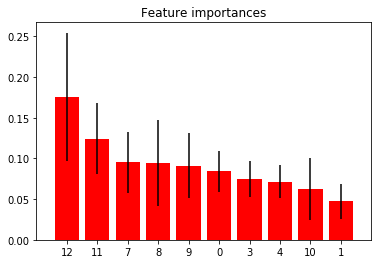

In [24]:
import matplotlib.pyplot as plt


forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(df.drop(columns = ["target"]),df["target"])
importances = forest.feature_importances_


std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(0,10):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], df.keys()[indices[f]], importances[indices[f]]))
    
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(0,10), importances[indices[:10]],
       color="r", yerr=std[indices][:10], align="center")
plt.xticks(range(0,10), indices)
plt.xlim([-1, 10])
plt.show()

# Dateset split

In [25]:
df = shuffle(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
227,-19.366337,1,0,0.130,0.127660,0,1,0.292079,1,0.258065,-0.39934,-0.729373,1,0
130,-0.366337,0,0,0.330,0.132979,0,1,0.455446,0,0.000000,0.60066,0.270627,0,1
120,9.633663,0,0,0.180,0.313830,0,1,0.252475,0,0.322581,-0.39934,1.270627,0,1
225,15.633663,1,0,0.255,0.085106,0,1,0.267327,1,0.419355,-1.39934,-0.729373,1,0
76,-3.366337,1,0,0.155,0.210993,1,0,0.470297,0,0.387097,-0.39934,-0.729373,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,4.633663,1,0,0.205,0.191489,0,1,0.445545,0,0.080645,-0.39934,-0.729373,1,1
251,-11.366337,1,0,0.190,0.214539,1,0,0.356436,1,0.016129,-0.39934,3.270627,1,0
302,2.633663,0,1,0.180,0.195035,0,0,0.509901,0,0.000000,-0.39934,0.270627,0,0
99,-1.366337,1,0,0.180,0.212766,1,0,0.504950,0,0.000000,0.60066,2.270627,0,1


In [26]:
Test_set = df[:100] # split 100 to test set
Train_set = df[100:]

Train_Y = Train_set["target"]
Train_X = Train_set.drop(columns = ["target"])
Test_Y = Test_set["target"]
Test_X = Test_set.drop(columns = ["target"])
Test_Y.value_counts(), Train_Y.value_counts()


(1    55
 0    45
 Name: target, dtype: int64,
 1    109
 0     92
 Name: target, dtype: int64)

In [27]:
# Working on imbalance dataset
rus = imblearn.over_sampling.SMOTE(ratio={1: 300, 0:200 }, random_state=0)


X_rus, Y_rus = rus.fit_sample(Train_X, Train_Y)
print(sorted(Counter(Y_rus).items()))

[(0, 200), (1, 300)]


# ML Models 

### Logistic Model

In [28]:

clf = sklearn.linear_model.LogisticRegressionCV(cv=3, random_state=0)
clf.fit(X_rus, Y_rus)

print(sklearn.metrics.classification_report(Y_rus, clf.predict(X_rus)) )
print(sklearn.metrics.classification_report(Test_Y, clf.predict(Test_X)) )



              precision    recall  f1-score   support

           0       0.87      0.78      0.82       200
           1       0.86      0.92      0.89       300

    accuracy                           0.86       500
   macro avg       0.87      0.85      0.86       500
weighted avg       0.86      0.86      0.86       500

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        45
           1       0.86      0.78      0.82        55

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



### Neural Network 

In [29]:
mlp = MLPClassifier(solver='adam',  # weight optimization
                    activation='tanh',  # activation function
                    alpha=0, # Regularizer value
                    hidden_layer_sizes=(10,10), # layer and node (node,node) --> numbers of layers
                    random_state=1, #random state
                    max_iter = 500, # max iteration
                    early_stopping = True) # early stop
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html





mlp.fit(X_rus, Y_rus) # fit the neural network
print(sklearn.metrics.classification_report(Y_rus, mlp.predict(X_rus)) )
print(sklearn.metrics.classification_report(Test_Y, mlp.predict(Test_X)) )




              precision    recall  f1-score   support

           0       0.83      0.42      0.56       200
           1       0.71      0.94      0.81       300

    accuracy                           0.73       500
   macro avg       0.77      0.68      0.69       500
weighted avg       0.76      0.73      0.71       500

              precision    recall  f1-score   support

           0       0.79      0.42      0.55        45
           1       0.66      0.91      0.76        55

    accuracy                           0.69       100
   macro avg       0.72      0.67      0.66       100
weighted avg       0.72      0.69      0.67       100



### Linear SVC 

In [30]:
lsvc = sklearn.svm.LinearSVC(penalty = "l2")


lsvc.fit(X_rus, Y_rus)
print(sklearn.metrics.classification_report(Y_rus, lsvc.predict(X_rus)) )
print(sklearn.metrics.classification_report(Test_Y, lsvc.predict(Test_X)) )



              precision    recall  f1-score   support

           0       0.87      0.78      0.82       200
           1       0.86      0.92      0.89       300

    accuracy                           0.86       500
   macro avg       0.87      0.85      0.86       500
weighted avg       0.86      0.86      0.86       500

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        45
           1       0.86      0.80      0.83        55

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



### Ploy SVC 

In [31]:
svc = sklearn.svm.SVC(gamma='auto', kernel = "poly", degree = 2, C = 10, probability = True)


svc.fit(Train_X, Train_Y)
print(sklearn.metrics.classification_report(Y_rus, svc.predict(X_rus)) )
print(sklearn.metrics.classification_report(Test_Y, svc.predict(Test_X)) )



              precision    recall  f1-score   support

           0       0.93      0.83      0.88       200
           1       0.89      0.96      0.93       300

    accuracy                           0.91       500
   macro avg       0.91      0.90      0.90       500
weighted avg       0.91      0.91      0.91       500

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        45
           1       0.85      0.84      0.84        55

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



# Ensemble learning

### Voting

In [32]:
model_list = [clf, mlp, svc, lsvc]
model_list_labels = ["clf", "mlp", "svc", "lsvc"]


lists = []
for i in zip(model_list_labels,model_list):
    lists.append(i)

In [33]:
VC_models = sklearn.ensemble.VotingClassifier(estimators=lists)
VC_models.fit(X_rus, Y_rus)
VC_models.score(X_rus, Y_rus)

0.872

In [34]:
print(sklearn.metrics.classification_report(Y_rus, VC_models.predict(X_rus)) )
print(sklearn.metrics.classification_report(Test_Y, VC_models.predict(Test_X)) )



              precision    recall  f1-score   support

           0       0.88      0.79      0.83       200
           1       0.87      0.93      0.90       300

    accuracy                           0.87       500
   macro avg       0.87      0.86      0.86       500
weighted avg       0.87      0.87      0.87       500

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        45
           1       0.86      0.80      0.83        55

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



### Stacking

In [35]:
meta = MLPClassifier(alpha = 20, solver = "adam", activation = "relu", max_iter = 1000) # early stop
model_list = [clf, mlp, svc, lsvc]

model_list = [
    ("Logistic",clf),("Neural Network",mlp),("SVC",svc),("Linear SVC",lsvc)
]
SC_models = sklearn.ensemble.StackingClassifier(estimators=model_list)
SC_models.fit(X_rus, Y_rus)
print(sklearn.metrics.classification_report(Y_rus, SC_models.predict(X_rus)) )
print(sklearn.metrics.classification_report(Test_Y, SC_models.predict(Test_X)) )

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       200
           1       0.90      0.95      0.93       300

    accuracy                           0.91       500
   macro avg       0.91      0.90      0.90       500
weighted avg       0.91      0.91      0.91       500

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        45
           1       0.90      0.85      0.88        55

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

